In [1]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [3]:
import finsymbols

### Data Extraction

In [4]:
start_date = "2017-01-01"
end_date = "2022-06-01"
file_name = "raw_data_etf.csv"
file_name_coint = "raw_data_coint_pairs.csv"
load_existing = False
load_coint_pairs = False

In [5]:
from pandas_datareader import data as pdr

In [6]:
nasdaq_list = 'ftp://ftp.nasdaqtrader.com/symboldirectory/nasdaqlisted.txt'


In [7]:
nasdaq = pd.read_csv(nasdaq_list, sep='|')

In [8]:
nasdaq.columns

Index(['Symbol', 'Security Name', 'Market Category', 'Test Issue',
       'Financial Status', 'Round Lot Size', 'ETF', 'NextShares'],
      dtype='object')

In [9]:
nasdaq['Market Category'].unique()

array(['G', 'S', 'Q', nan], dtype=object)

In [10]:
nasdaq['ETF'].unique()

array(['N', 'Y', nan], dtype=object)

In [11]:
nasdaq.isna().sum()

Symbol              1
Security Name       1
Market Category     1
Test Issue          1
Financial Status    1
Round Lot Size      1
ETF                 9
NextShares          1
dtype: int64

In [12]:
nasdaq.dropna(inplace= True)

In [13]:
symbols = nasdaq[(nasdaq['ETF']=='Y')]

In [14]:
symbols.set_index('Symbol',inplace = True)



In [15]:
symbols = list(symbols.index.values)

In [16]:
np.array(symbols)

array(['AADR', 'AAPB', 'AAPD', 'AAPU', 'AAXJ', 'ABCS', 'ACWI', 'ACWX',
       'AGNG', 'AGZD', 'AIA', 'AIQ', 'AIRL', 'AIRR', 'ALTY', 'AMDL',
       'AMDS', 'AMID', 'AMZD', 'AMZU', 'AMZZ', 'ANGL', 'AOTG', 'AQWA',
       'ARVR', 'ASET', 'AUMI', 'AVXC', 'BABX', 'BBH', 'BDGS', 'BEEZ',
       'BGRN', 'BIB', 'BIS', 'BITS', 'BJK', 'BKCH', 'BKIV', 'BKWO',
       'BLCN', 'BLCR', 'BLLD', 'BND', 'BNDW', 'BNDX', 'BOTZ', 'BRNY',
       'BRRR', 'BRTR', 'BSCO', 'BSCP', 'BSCQ', 'BSCR', 'BSCS', 'BSCT',
       'BSCU', 'BSCV', 'BSCW', 'BSCX', 'BSJO', 'BSJP', 'BSJQ', 'BSJR',
       'BSJS', 'BSJT', 'BSJU', 'BSJV', 'BSMO', 'BSMP', 'BSMQ', 'BSMR',
       'BSMS', 'BSMT', 'BSMU', 'BSMV', 'BSMW', 'BSSX', 'BSVO', 'BTEC',
       'BTF', 'BTFX', 'BUFC', 'BUG', 'BULD', 'CA', 'CACG', 'CAFG', 'CALY',
       'CANC', 'CANQ', 'CARZ', 'CATH', 'CCSB', 'CCSO', 'CDC', 'CDL',
       'CEFA', 'CFA', 'CFO', 'CHPS', 'CIBR', 'CID', 'CIL', 'CIZ', 'CLOA',
       'CLOD', 'CLOU', 'CLSM', 'CNCR', 'COMT', 'CONL', 'COPJ', 'COPP',
       '

In [17]:
yf.pdr_override()


In [18]:
data = pdr.get_data_yahoo(symbols, start = start_date,end = end_date)


[*********************100%%**********************]  619 of 619 completed


198 Failed downloads:
['TBIL', 'MAGX', 'QQQS', 'UTWY', 'DGCB', 'JIVE', 'JGLO', 'IBIT', 'TSLQ', 'BSMW', 'EHLS', 'MEMS', 'MCSE', 'USRD', 'MSFL', 'SETM', 'SMCO', 'AIRL', 'NIKL', 'HCOW', 'AMDL', 'TSLR', 'ICOP', 'NUSB', 'LGRO', 'BSCW', 'CPLS', 'TDI', 'MAXI', 'FEPI', 'BDGS', 'PTEC', 'QSML', 'QMID', 'MEDX', 'FDIF', 'IBTM', 'TSLT', 'QOWZ', 'SPAQ', 'FLDB', 'NVDU', 'GINX', 'ETEC', 'NTZG', 'TRES', 'AMZU', 'AOTG', 'MSFU', 'NPFI', 'DYNI', 'AAPB', 'IBTO', 'VFLO', 'BKWO', 'NVDL', 'WISE', 'NSCR', 'BSJU', 'TSLS', 'COPP', 'FBOT', 'FIXT', 'USVN', 'GPIX', 'COWS', 'CCSO', 'CZAR', 'BKIV', 'NEWZ', 'MAGS', 'CHPS', 'HQGO', 'TSLZ', 'CLOA', 'NCPB', 'USCL', 'BSCX', 'MODL', 'UPGR', 'DVAL', 'CCSB', 'CANC', 'IBAT', 'QQQI', 'AAPD', 'AMDS', 'DYFI', 'PSWD', 'COPJ', 'NVDS', 'IBOT', 'SFLO', 'BRTR', 'USSH', 'URNJ', 'WABF', 'VGSR', 'CANQ', 'JTEK', 'FBL', 'INRO', 'USDX', 'BEEZ', 'SPAM', 'UNIY', 'WTBN', 'BSSX', 'ILIT', 'DFGX', 'BRNY', 'TSLL', 'TSDD', 'AMZZ', 'GPIQ', 'UTRE', 'DIVD', 'AAPU', 'TXSS', 'BSVO', 'NVDD', 'PDBA', 'R

In [19]:
data = data['Adj Close']

In [20]:
data.dropna(axis = 1, inplace = True)

In [21]:
data.isna().sum()

AADR    0
AAXJ    0
ACWI    0
ACWX    0
AGNG    0
       ..
VWOB    0
VXUS    0
VYMI    0
WOOD    0
XT      0
Length: 258, dtype: int64

In [22]:
data.to_csv(file_name)

In [23]:
df = pd.read_csv(f'/Users/vadimsmirnov/{file_name}')

In [24]:
df.shape

(1362, 259)

In [25]:
df

,Date,AADR,AAXJ,ACWI,ACWX,AGNG,AGZD,AIA,AIRR,ALTY,...,VTHR,VTIP,VTWG,VTWO,VTWV,VWOB,VXUS,VYMI,WOOD,XT
0,2017-01-03 00:00:00,38.256798,48.610233,52.050159,33.607414,14.513458,18.396423,40.685707,23.448168,8.458342,...,92.241486,39.760571,106.508606,49.461540,90.864624,55.173958,37.350452,42.318401,47.666119,25.109818
1,2017-01-04 00:00:00,38.915295,49.092220,52.495319,33.980915,14.513458,18.438414,40.903088,23.793991,8.577237,...,93.301628,39.776737,108.744774,50.203377,92.239380,55.393810,37.762669,42.747505,48.091228,25.436157
2,2017-01-05 00:00:00,39.332634,49.784519,52.696087,34.271423,14.513458,18.434597,41.407421,23.390036,8.641214,...,93.132370,39.825268,107.907402,49.702751,90.995972,55.748413,38.045570,43.161808,48.055801,25.520079
3,2017-01-06 00:00:00,39.202805,49.539143,52.704815,34.130318,14.513458,18.419329,41.233509,23.390036,8.724435,...,93.372910,39.760571,107.355499,49.493404,90.505608,55.592388,37.964741,42.932457,48.055801,25.566698
4,2017-01-09 00:00:00,39.341911,49.582966,52.582607,34.080521,14.513458,18.373516,41.346550,22.897406,8.668384,...,93.052177,39.784836,107.288902,49.161152,89.411079,55.734215,37.891998,42.814095,47.745827,25.629169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2022-05-24 00:00:00,53.090729,65.639610,85.446503,45.733273,25.372007,19.804804,58.310280,38.291504,10.459923,...,170.870697,46.609993,148.122711,68.658867,121.113655,58.368710,51.653904,58.658779,83.268669,49.136436
1358,2022-05-25 00:00:00,53.415905,65.947273,86.034584,45.780567,25.474472,19.813444,58.766796,38.734734,10.538306,...,172.916412,46.665077,151.053482,69.938599,123.537651,58.764065,51.738121,58.821747,84.385857,49.680088
1359,2022-05-26 00:00:00,54.267120,67.004898,87.451797,46.367012,25.576937,19.835045,59.955635,39.392105,10.629753,...,176.542480,46.811970,155.026779,71.460693,125.837074,58.925812,52.355721,59.337795,85.686020,50.658661
1360,2022-05-27 00:00:00,54.640125,67.850998,89.235336,46.944000,26.000591,19.917131,61.144474,40.517593,10.725556,...,180.779343,46.876236,159.934326,73.380264,128.711395,59.168396,53.020107,59.817642,86.600952,52.012859


### Feature Engineering

In [26]:
#Create DataFrame with Returns and Volatility Information
df_returns = pd.DataFrame(data.pct_change().mean()*255,columns = ['Returns'])
df_returns['Volatility'] = data.pct_change().std()*np.sqrt(255)
df_returns.head(10)

,Returns,Volatility
AADR,0.093047,0.233645
AAXJ,0.088006,0.211977
ACWI,0.117369,0.184689
ACWX,0.079741,0.183604
AGNG,0.125519,0.187271
AGZD,0.015283,0.035918
AIA,0.106508,0.229295
AIRR,0.138432,0.273456
ALTY,0.065182,0.203712
ANGL,0.056786,0.105320


In [27]:
#Scale Features
scaler = StandardScaler()
scaler = scaler.fit_transform(df_returns)
scaled_data = pd.DataFrame(scaler,columns = df_returns.columns, index = df_returns.index)
df_scaled = scaled_data
df_scaled.head()

,Returns,Volatility
AADR,-0.041371,0.284620
AAXJ,-0.104257,0.062330
ACWI,0.262045,-0.217623
ACWX,-0.207356,-0.228763
AGNG,0.363713,-0.191134


### K-Means Clustering

In [28]:
# Find the optimum number of clusters

X = df_scaled.copy()
K = range(1,15)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

k1 = KneeLocator(K, distortions, curve = 'convex',direction = 'decreasing')
c = k1.elbow
print('Optimum Clusters: ', c)

Optimum Clusters:  5


In [29]:
# Fit K-Means Model

k_means = KMeans(n_clusters = c)
k_means.fit(X)
prediction = k_means.predict(df_scaled)

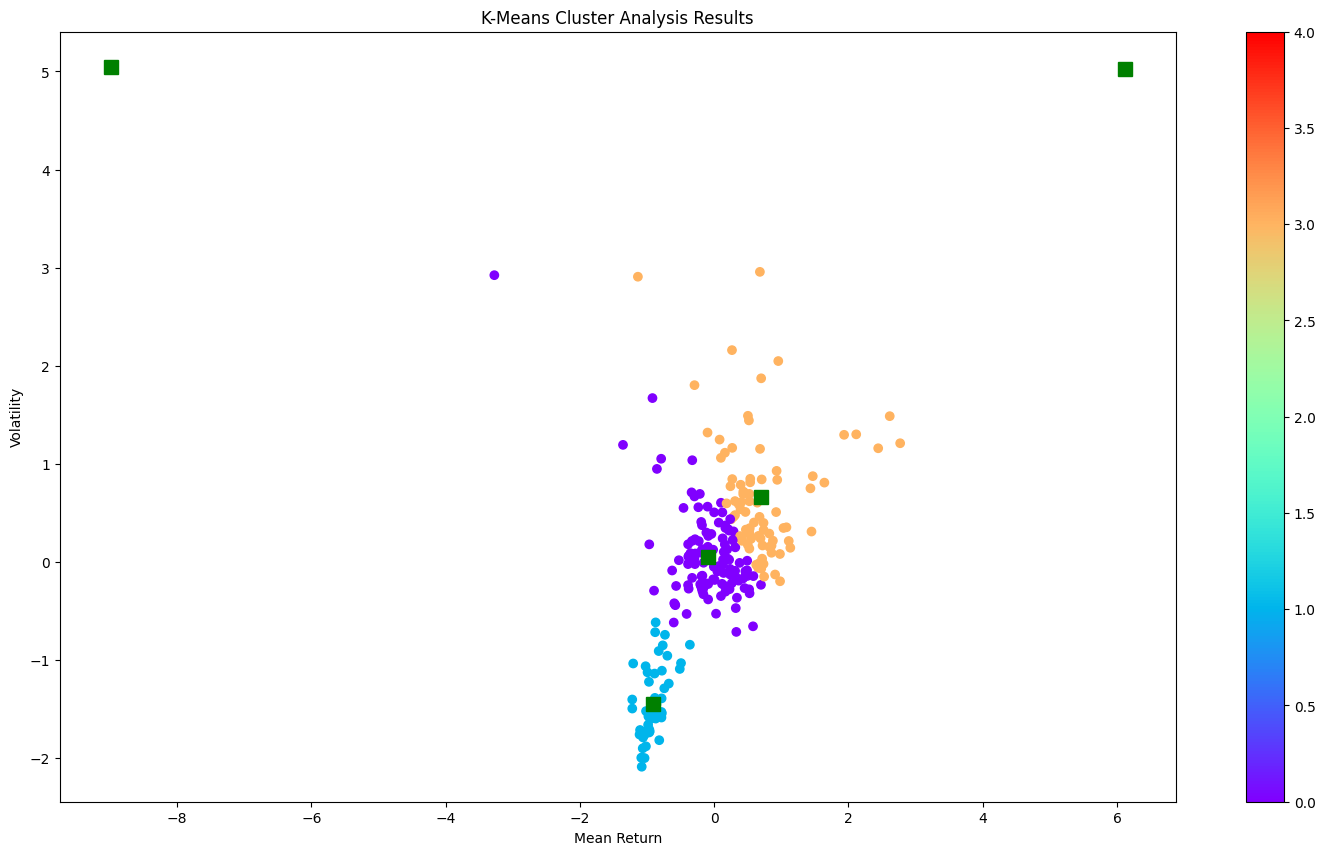

In [30]:
# Show Results 

centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = k_means.labels_,cmap = "rainbow",label = X.index)
ax.set_title("K-Means Cluster Analysis Results")
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize = 10)
plt.show()

In [31]:
kmeans.labels_

array([ 9,  6,  2,  6,  2,  1,  9,  8,  6, 10,  6,  9, 11,  7,  0,  1,  1,
        9,  1,  1,  1, 10,  8,  9, 12,  2,  2,  2,  2, 12,  6,  6,  6,  0,
        2,  9,  9,  6,  8,  6,  9,  6,  9,  2,  2,  8,  6,  9,  6, 10, 10,
        6,  6,  6,  6, 12,  0, 11, 10,  9, 12, 10, 11,  8,  6,  2,  6,  6,
        9, 10,  9,  6,  6,  2,  6,  6,  8,  6,  9,  8,  1,  9,  9, 12,  6,
       12,  2,  9,  9, 12,  2,  9,  2,  6, 10, 12,  1,  1,  6,  2,  4,  8,
        8,  9, 12,  2,  8,  8,  8,  1, 10, 12,  6, 10,  1, 10, 10,  9,  4,
        1,  1,  6,  6,  6,  6,  1,  1,  1,  9,  9,  6,  9,  2,  1,  6,  1,
        1, 12,  2,  6,  6, 12,  9,  8,  9,  9,  0,  0, 12,  1,  2,  1,  0,
        6, 10, 12,  9,  2,  2, 12,  2, 12,  2,  8, 10,  9,  2,  0, 12,  2,
        9,  2,  2, 12,  9,  2,  9, 12,  9,  2,  8, 13,  0, 12,  8,  8,  8,
        6, 12,  2,  4,  4, 12,  2, 11,  9,  8,  0,  6,  4,  8, 12, 12, 12,
        2,  4,  9,  6, 12,  6,  6,  6,  8,  2, 12,  6,  2,  1,  1,  1, 12,
        1,  6,  4, 12,  8

In [32]:
#Return the series

clustered_series = pd.Series(index = X.index, data = k_means.labels_.flatten())


In [33]:
clustered_series_all = pd.Series(index = X.index, data = k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
clustered_series[:7]

AADR    0
AAXJ    0
ACWI    0
ACWX    0
AGNG    0
AGZD    1
AIA     0
dtype: int32

In [34]:
len(clustered_series)

258

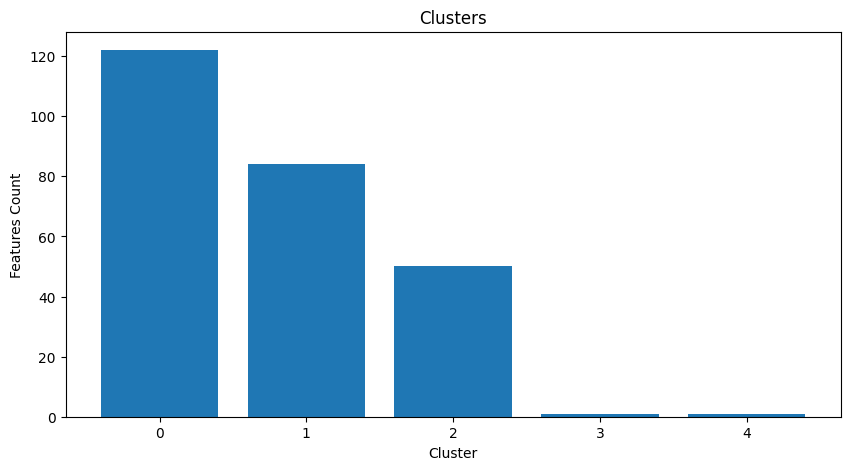

In [35]:
plt.figure(figsize = (10,5))
plt.bar(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('Features Count')
plt.show()

In [36]:
# Remove Items of Preferred
clusters_clean = clustered_series[clustered_series<3]
print('Feature Number Previous: ', len(clustered_series))
print('Feature Number Current: ', len(clusters_clean))

Feature Number Previous:  258
Feature Number Current:  173


### Calculate Cointegration

In [37]:
# Calculate cointegration

def calculate_cointegration(series_1,series_2):
    coint_flag = 0
    coint_res = coint(series_1,series_2)
    coint_t = coint_res[0]
    p_value = coint_res[1]
    critical_value = coint_res[2][1]
    model = sm.OLS(series_1,series_2).fit()
    hedge_ratio = model.params[0]
    coint_flag = 1 if p_value<0.05 and coint_t<critical_value else 0
    return coint_flag, hedge_ratio

In [38]:
load_cointegrated_pairs = []

In [41]:
# Loop through and calculated cointegrated pairs
tested_pairs = []
cointegrated_pairs = []
if not load_coint_pairs:
    for base_asset in clusters_clean.index:
        base_label = clusters_clean[base_asset]

        for compare_asset in clusters_clean.index:
            compare_label = clusters_clean[compare_asset]

            test_pair = base_asset+compare_asset
            test_pair = ''.join(sorted(test_pair))
            is_tested = test_pair in tested_pairs
            tested_pairs.append(test_pair)

            if compare_asset != base_asset and base_label == compare_label and not is_tested:

                series_1 = data[base_asset].values.astype(float)
                series_2 = data[compare_asset].values.astype(float)
                coint_flag,_ = calculate_cointegration(series_1,series_2)
                if coint_flag==1:
                    cointegrated_pairs.append({'base_asset':base_asset,
                                               'compare_asset':compare_asset,
                                               'label':base_label})
    df_coint = pd.DataFrame(cointegrated_pairs).sort_values(by = 'label')
    df_coint.to_csv(file_name_coint)

In [47]:
pd.read_csv(f'/Users/vadimsmirnov/{file_name_coint}').label


0      0
1      0
2      0
3      0
4      0
      ..
270    1
271    1
272    1
273    1
274    1
Name: label, Length: 275, dtype: int64

### TSNE Plot for Visualization

In [48]:
#Get Unique list of cointegrated assets
coint_assets = [df_coint['base_asset'].values]
coint_assets.append(df_coint['compare_asset'].values)
coint_unique_assets = np.unique(coint_assets)
coint_unique_assets

array(['AADR', 'AAXJ', 'ACWI', 'ACWX', 'AGNG', 'AGZD', 'AIA', 'ALTY',
       'ANGL', 'ASET', 'BIS', 'BJK', 'BND', 'CDC', 'CFO', 'CID', 'CIL',
       'CIZ', 'CSA', 'CSB', 'CSF', 'DAX', 'DDIV', 'DGRE', 'DGRS', 'DGRW',
       'DVY', 'DXJS', 'EEMA', 'EFAS', 'EMB', 'EMCB', 'EMIF', 'ESGD',
       'ESGE', 'EUFN', 'FALN', 'FCEF', 'FCVT', 'FDT', 'FDTS', 'FEM',
       'FEMS', 'FEP', 'FEUZ', 'FEX', 'FGM', 'FID', 'FJP', 'FKU', 'FMB',
       'FSZ', 'FTA', 'FTAG', 'FTHI', 'FTSL', 'FTSM', 'FTXG', 'FTXH',
       'FTXR', 'FVC', 'GNMA', 'HEWG', 'HYLS', 'HYXF', 'IEI', 'IEUS',
       'IFV', 'IGF', 'IGIB', 'IGSB', 'IMCV', 'IMOM', 'IPKW', 'ISHP',
       'ISTB', 'IUSB', 'IUSV', 'IVAL', 'IXUS', 'KBWD', 'LMBS', 'LVHD',
       'MBB', 'MFLX', 'NFTY', 'NXTG', 'NZAC', 'PDBC', 'PEY', 'PFF', 'PFI',
       'PID', 'PIE', 'PIO', 'PIZ', 'PPH', 'PRFZ', 'PSCC', 'PSCF', 'PSCU',
       'PUI', 'QABA', 'QAT', 'QQXT', 'QVAL', 'QYLD', 'RFDI', 'RFEM',
       'RFEU', 'RNRG', 'SCZ', 'SDG', 'SHV', 'SHY', 'SKOR', 'SLQD', 'SMCP',
   

In [49]:
df_TSNE = df_scaled.copy()
df_TSNE = df_TSNE[df_TSNE.index.isin(coint_unique_assets)]
df_TSNE.head()

,Returns,Volatility
AADR,-0.041371,0.284620
AAXJ,-0.104257,0.062330
ACWI,0.262045,-0.217623
ACWX,-0.207356,-0.228763
AGNG,0.363713,-0.191134


In [50]:
#Compute TSNE
X_tsne = TSNE(learning_rate = 30, perplexity = 5, random_state=42,n_jobs=-1).fit_transform(df_TSNE)

In [51]:
X_tsne[:5]

array([[ -7.033546 ,  28.641933 ],
       [-15.109907 ,  36.005356 ],
       [ -9.256629 , -30.083664 ],
       [-31.404522 ,  -2.495784 ],
       [ -5.7666483, -29.817059 ]], dtype=float32)

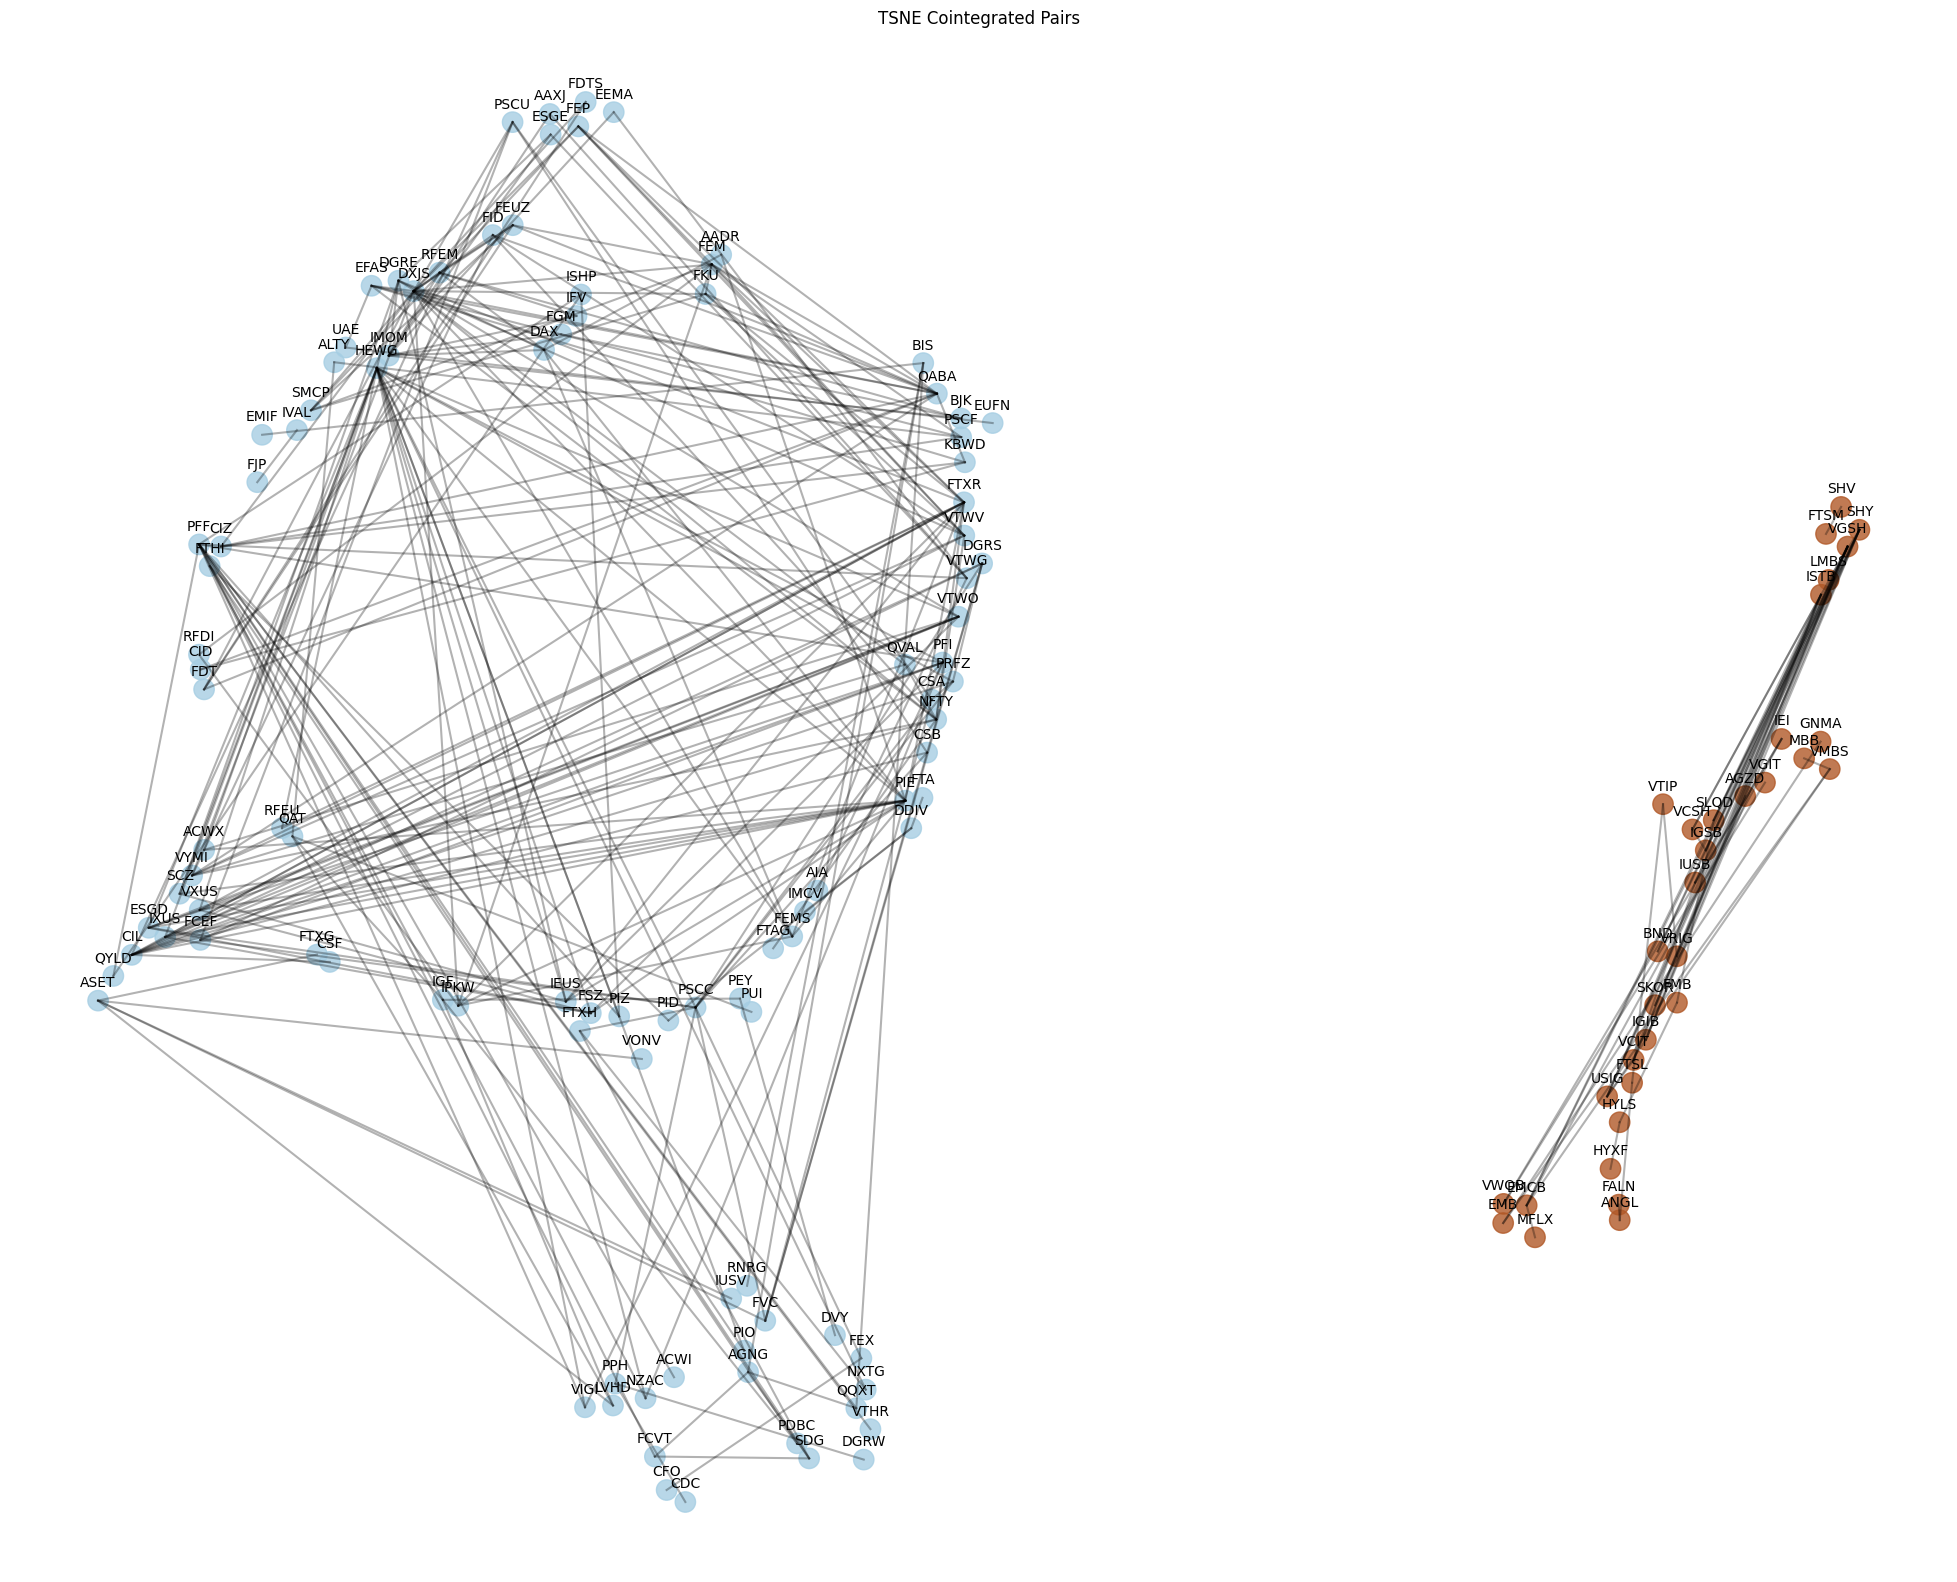

In [62]:
#Preview TSNE
in_pairs_series = clustered_series.loc[coint_unique_assets]
plt.figure(1,figsize=(25,20))
plt.clf()
plt.axis('off')
for index, pair in df_coint.iterrows():
    ticker1=pair[0]
    loc1=df_TSNE.index.get_loc(pair[0])
    x1,y1 = X_tsne[loc1,:]
    ticker2 = pair[0]
    loc2 = df_TSNE.index.get_loc(pair[1])
    x2,y2 = X_tsne[loc2,:]
    plt.plot([x1,x2],[y1,y2],'k-',alpha = 0.3)

plt.scatter(X_tsne[:,0],X_tsne[:,1], s = 215, alpha = 0.8, c = in_pairs_series.values,cmap = cm.Paired)
plt.title('TSNE Cointegrated Pairs')

#Show TSNE Plot
for x,y, name in zip(X_tsne[:,0],X_tsne[:,1],df_TSNE.index):
    label = name
    plt.annotate(label, (x,y), textcoords = 'offset points', xytext =(0,10), ha = 'center')
plt.show()

### Review a Pair

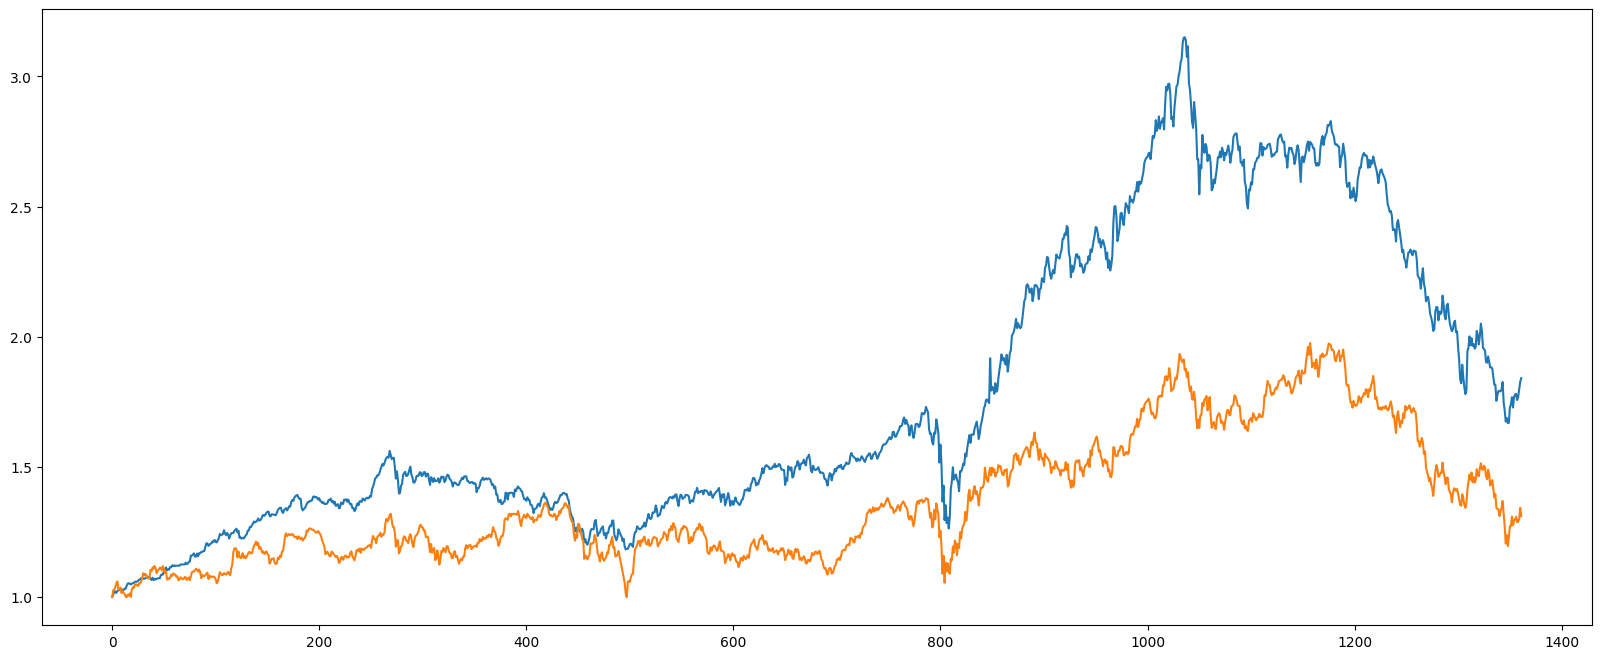

In [71]:
#Plot price comparison for any given assets
asset_1 = 'FPXI'
asset_2 = 'IBB'
asset_1_values = data[asset_1].values / data[asset_1].iloc[0].item()
asset_2_values = data[asset_2].values / data[asset_2].iloc[0].item()
plt.figure(1,figsize = (20,8))
plt.plot(asset_1_values)
plt.plot(asset_2_values )
plt.show()

In [68]:

data['FPXI'].values / data['FPXI'].iloc[0].item()

array([1.        , 1.00893894, 1.02409661, ..., 1.7973185 , 1.82722658,
       1.8409681 ])

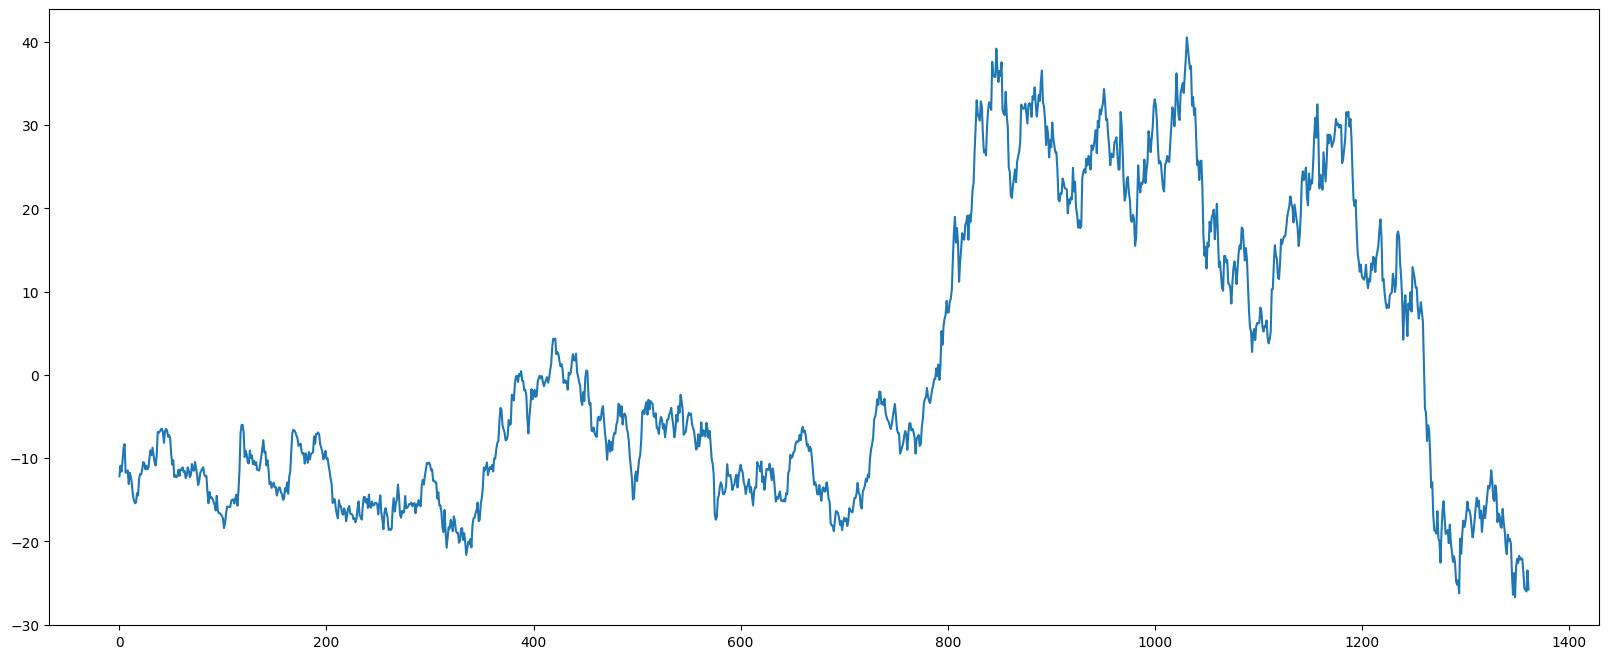

In [82]:
#Plot the Spread

series_1 = data[asset_1].values.astype(float)
series_1 = data[asset_2].values.astype(float)

coint_flag,hedge_ratio = calculate_cointegration(series_1,series_2)
spread = series_1-(hedge_ratio*series_2)
plt.figure(1,figsize = (20,8))
plt.plot(spread)
plt.show()

In [83]:
# PLot the Z score
window = 100
spread_series = pd.Series(spread)
mean = spread_series.rolling(center = False,window = window).mean()
std = spread_series.rolling(center = False, window = window).std()
x = spread_series.rolling(center = False, window = 1).mean()
z_score = (x-mean)/std

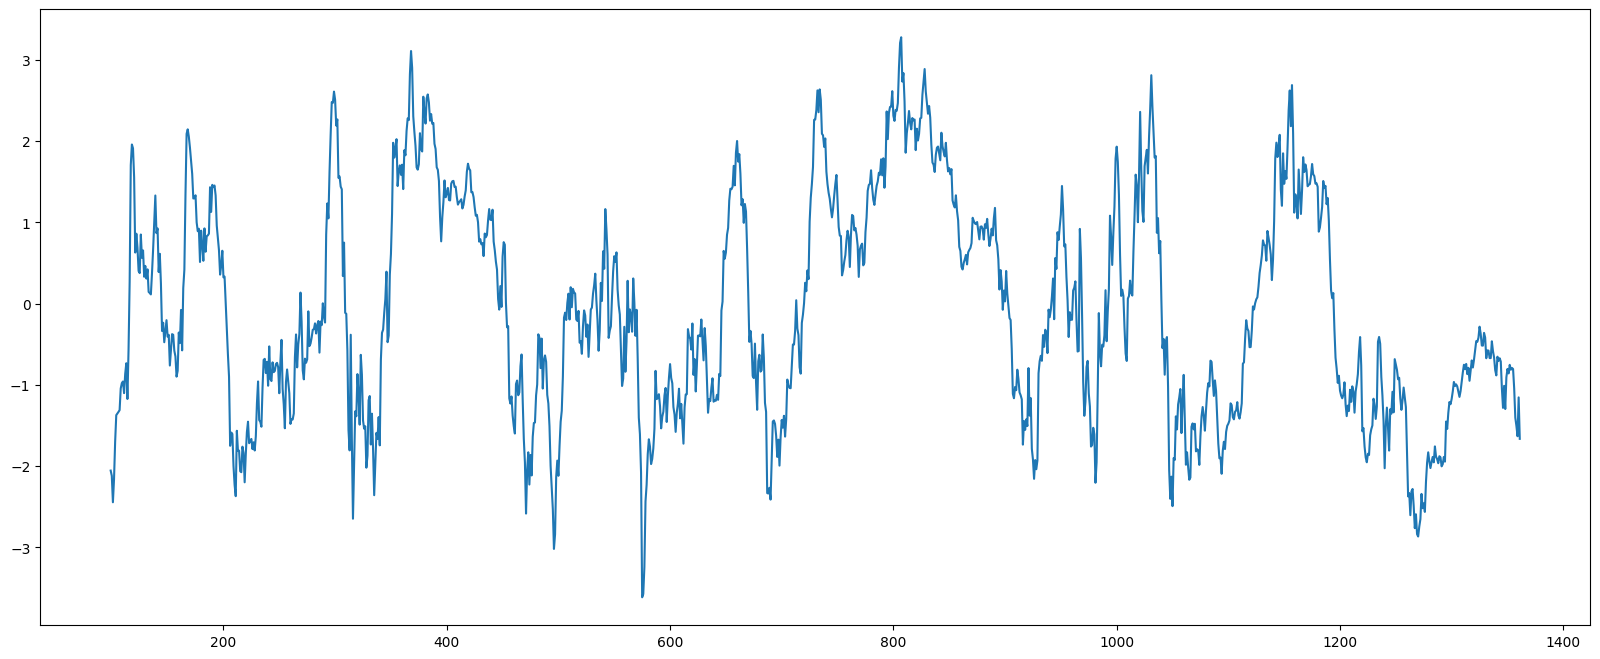

In [86]:
plt.figure(1,figsize = (20,8))
plt.plot(z_score)
plt.show()